In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

from samples.ccp import ccp

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

In [2]:
ccp_config = ccp.CCPConfig()
ccp_config.display()
CCP_DIR = "C:\\Users\\bbuke\\OneDrive\\Masaüstü\\ip\\co-parsing\\clothing-co-parsing-master\\"


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                71
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [3]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [4]:
# Training dataset
dataset_train = ccp.CCPDataset()
dataset_train.load_ccp("train")
dataset_train.prepare()

# Validation dataset
dataset_val = ccp.CCPDataset()
dataset_val.load_ccp("test")
dataset_val.prepare()

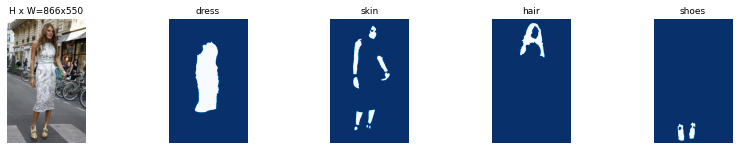

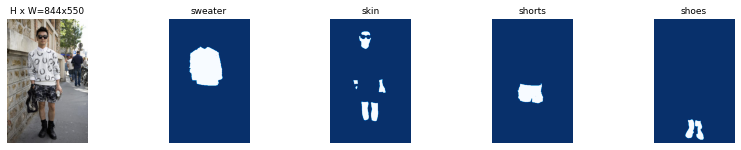

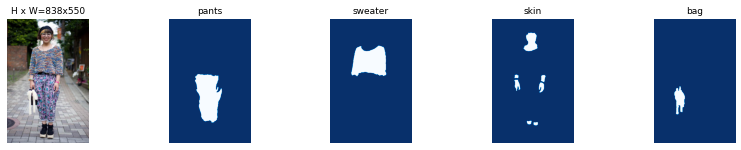

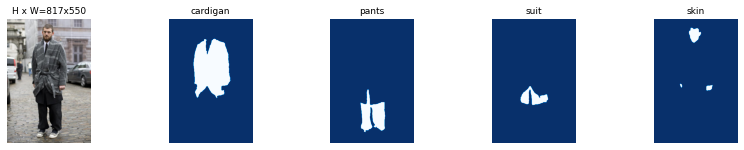

In [5]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [6]:
model = modellib.MaskRCNN(mode="training", config=ccp_config,
                          model_dir=MODEL_DIR)

In [7]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=ccp_config.LEARNING_RATE, 
            epochs=2, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: C:\Users\bbuke\aktwelve_mask_rcnn\logs\ccp20210423T1153\mask_rcnn_ccp_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_deco

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\tensorflow\python\framework\indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/sub:0", shape=(None,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/GatherV2_2:0", shape=(None, 7, 7, 256), dtype=float32), dense_shape=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/Shape:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a

  1/100 [..............................] - ETA: 46:33 - batch: 0.0000e+00 - size: 1.0000 - loss: 7.9878 - rpn_class_loss: 0.1767 - rpn_bbox_loss: 0.7453 - mrcnn_class_loss: 4.2477 - mrcnn_bbox_loss: 1.2087 - mrcnn_mask_loss: 1.6094

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/100 [..............................] - ETA: 38:51 - batch: 0.5000 - size: 1.0000 - loss: 7.6069 - rpn_class_loss: 0.1922 - rpn_bbox_loss: 1.3733 - mrcnn_class_loss: 3.6068 - mrcnn_bbox_loss: 1.2302 - mrcnn_mask_loss: 1.2044    

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/100 [..............................] - ETA: 37:26 - batch: 1.0000 - size: 1.0000 - loss: 7.5104 - rpn_class_loss: 0.3494 - rpn_bbox_loss: 1.5928 - mrcnn_class_loss: 3.3138 - mrcnn_bbox_loss: 1.2378 - mrcnn_mask_loss: 1.0166

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/100 [>.............................] - ETA: 36:58 - batch: 1.5000 - size: 1.0000 - loss: 6.9014 - rpn_class_loss: 0.3094 - rpn_bbox_loss: 1.4097 - mrcnn_class_loss: 2.9901 - mrcnn_bbox_loss: 1.2102 - mrcnn_mask_loss: 0.9820

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/100 [>.............................] - ETA: 37:14 - batch: 2.0000 - size: 1.0000 - loss: 6.5545 - rpn_class_loss: 0.2787 - rpn_bbox_loss: 1.2678 - mrcnn_class_loss: 2.8596 - mrcnn_bbox_loss: 1.2033 - mrcnn_mask_loss: 0.9451

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/100 [>.............................] - ETA: 37:24 - batch: 2.5000 - size: 1.0000 - loss: 6.5689 - rpn_class_loss: 0.2783 - rpn_bbox_loss: 1.4965 - mrcnn_class_loss: 2.6915 - mrcnn_bbox_loss: 1.2088 - mrcnn_mask_loss: 0.8939

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/100 [=>............................] - ETA: 36:14 - batch: 3.0000 - size: 1.0000 - loss: 6.3539 - rpn_class_loss: 0.2563 - rpn_bbox_loss: 1.4420 - mrcnn_class_loss: 2.6072 - mrcnn_bbox_loss: 1.1651 - mrcnn_mask_loss: 0.8832

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/100 [=>............................] - ETA: 35:21 - batch: 3.5000 - size: 1.0000 - loss: 6.1816 - rpn_class_loss: 0.2377 - rpn_bbox_loss: 1.3388 - mrcnn_class_loss: 2.5820 - mrcnn_bbox_loss: 1.1632 - mrcnn_mask_loss: 0.8599

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/100 [=>............................] - ETA: 34:38 - batch: 4.0000 - size: 1.0000 - loss: 5.9483 - rpn_class_loss: 0.2337 - rpn_bbox_loss: 1.2677 - mrcnn_class_loss: 2.4496 - mrcnn_bbox_loss: 1.1596 - mrcnn_mask_loss: 0.8377

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/100 [==>...........................] - ETA: 34:04 - batch: 4.5000 - size: 1.0000 - loss: 6.1947 - rpn_class_loss: 0.2542 - rpn_bbox_loss: 1.5553 - mrcnn_class_loss: 2.4188 - mrcnn_bbox_loss: 1.1299 - mrcnn_mask_loss: 0.8365

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 11/100 [==>...........................] - ETA: 33:48 - batch: 5.0000 - size: 1.0000 - loss: 6.1183 - rpn_class_loss: 0.2672 - rpn_bbox_loss: 1.5534 - mrcnn_class_loss: 2.3674 - mrcnn_bbox_loss: 1.1053 - mrcnn_mask_loss: 0.8250

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/100 [==>...........................] - ETA: 33:32 - batch: 5.5000 - size: 1.0000 - loss: 5.9299 - rpn_class_loss: 0.2483 - rpn_bbox_loss: 1.4838 - mrcnn_class_loss: 2.2939 - mrcnn_bbox_loss: 1.0862 - mrcnn_mask_loss: 0.8177

C:\Users\bbuke\anaconda3\envs\mask_rcnn\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


In [16]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=ccp_config.LEARNING_RATE / 10,
            epochs=3, 
            layers="all")


Starting at epoch 1. LR=0.0001

Checkpoint Path: C:\Users\bbuke\aktwelve_mask_rcnn\logs\ccp20210418T1606\mask_rcnn_ccp_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

  1/100 [..............................] - ETA: 1:00:47 - batch: 0.0000e+00 - size: 8.0000 - loss: 4.8506 - rpn_class_loss: 0.0474 - rpn_bbox_loss: 0.6743 - mrcnn_class_loss: 0.7134 - mrcnn_bbox_loss: 0.4421 - mrcnn_mask_loss: 0.5481

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

  2/100 [..............................] - ETA: 32:33 - batch: 0.5000 - size: 8.0000 - loss: 5.1951 - rpn_class_loss: 0.0532 - rpn_bbox_loss: 0.8060 - mrcnn_class_loss: 0.7320 - mrcnn_bbox_loss: 0.4307 - mrcnn_mask_loss: 0.5756      

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

  3/100 [..............................] - ETA: 32:23 - batch: 1.0000 - size: 8.0000 - loss: 5.0306 - rpn_class_loss: 0.0468 - rpn_bbox_loss: 0.7347 - mrcnn_class_loss: 0.7302 - mrcnn_bbox_loss: 0.4277 - mrcnn_mask_loss: 0.5757

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

  4/100 [>.............................] - ETA: 31:33 - batch: 1.5000 - size: 8.0000 - loss: 4.9632 - rpn_class_loss: 0.0459 - rpn_bbox_loss: 0.7196 - mrcnn_class_loss: 0.7129 - mrcnn_bbox_loss: 0.4230 - mrcnn_mask_loss: 0.5802

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

  5/100 [>.............................] - ETA: 31:12 - batch: 2.0000 - size: 8.0000 - loss: 4.9947 - rpn_class_loss: 0.0493 - rpn_bbox_loss: 0.7360 - mrcnn_class_loss: 0.7073 - mrcnn_bbox_loss: 0.4286 - mrcnn_mask_loss: 0.5762

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

  6/100 [>.............................] - ETA: 30:59 - batch: 2.5000 - size: 8.0000 - loss: 5.0334 - rpn_class_loss: 0.0495 - rpn_bbox_loss: 0.7316 - mrcnn_class_loss: 0.7212 - mrcnn_bbox_loss: 0.4430 - mrcnn_mask_loss: 0.5713

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

  7/100 [=>............................] - ETA: 30:27 - batch: 3.0000 - size: 8.0000 - loss: 5.0919 - rpn_class_loss: 0.0512 - rpn_bbox_loss: 0.7329 - mrcnn_class_loss: 0.7439 - mrcnn_bbox_loss: 0.4459 - mrcnn_mask_loss: 0.5721

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

  8/100 [=>............................] - ETA: 30:08 - batch: 3.5000 - size: 8.0000 - loss: 5.1661 - rpn_class_loss: 0.0527 - rpn_bbox_loss: 0.7515 - mrcnn_class_loss: 0.7553 - mrcnn_bbox_loss: 0.4486 - mrcnn_mask_loss: 0.5750

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

  9/100 [=>............................] - ETA: 29:43 - batch: 4.0000 - size: 8.0000 - loss: 5.1142 - rpn_class_loss: 0.0519 - rpn_bbox_loss: 0.7377 - mrcnn_class_loss: 0.7481 - mrcnn_bbox_loss: 0.4442 - mrcnn_mask_loss: 0.5752

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 10/100 [==>...........................] - ETA: 29:20 - batch: 4.5000 - size: 8.0000 - loss: 5.1590 - rpn_class_loss: 0.0512 - rpn_bbox_loss: 0.7435 - mrcnn_class_loss: 0.7553 - mrcnn_bbox_loss: 0.4517 - mrcnn_mask_loss: 0.5778

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 11/100 [==>...........................] - ETA: 28:58 - batch: 5.0000 - size: 8.0000 - loss: 5.1832 - rpn_class_loss: 0.0517 - rpn_bbox_loss: 0.7750 - mrcnn_class_loss: 0.7491 - mrcnn_bbox_loss: 0.4444 - mrcnn_mask_loss: 0.5713

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 12/100 [==>...........................] - ETA: 28:36 - batch: 5.5000 - size: 8.0000 - loss: 5.1231 - rpn_class_loss: 0.0524 - rpn_bbox_loss: 0.7734 - mrcnn_class_loss: 0.7297 - mrcnn_bbox_loss: 0.4371 - mrcnn_mask_loss: 0.5690

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 13/100 [==>...........................] - ETA: 28:23 - batch: 6.0000 - size: 8.0000 - loss: 5.1403 - rpn_class_loss: 0.0534 - rpn_bbox_loss: 0.7727 - mrcnn_class_loss: 0.7362 - mrcnn_bbox_loss: 0.4376 - mrcnn_mask_loss: 0.5703

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 14/100 [===>..........................] - ETA: 28:08 - batch: 6.5000 - size: 8.0000 - loss: 5.1294 - rpn_class_loss: 0.0542 - rpn_bbox_loss: 0.7862 - mrcnn_class_loss: 0.7204 - mrcnn_bbox_loss: 0.4328 - mrcnn_mask_loss: 0.5711

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 15/100 [===>..........................] - ETA: 27:47 - batch: 7.0000 - size: 8.0000 - loss: 5.1110 - rpn_class_loss: 0.0544 - rpn_bbox_loss: 0.7828 - mrcnn_class_loss: 0.7172 - mrcnn_bbox_loss: 0.4294 - mrcnn_mask_loss: 0.5718

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 16/100 [===>..........................] - ETA: 27:26 - batch: 7.5000 - size: 8.0000 - loss: 5.0848 - rpn_class_loss: 0.0545 - rpn_bbox_loss: 0.7766 - mrcnn_class_loss: 0.7149 - mrcnn_bbox_loss: 0.4257 - mrcnn_mask_loss: 0.5706

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 17/100 [====>.........................] - ETA: 27:04 - batch: 8.0000 - size: 8.0000 - loss: 5.0695 - rpn_class_loss: 0.0537 - rpn_bbox_loss: 0.7816 - mrcnn_class_loss: 0.7066 - mrcnn_bbox_loss: 0.4247 - mrcnn_mask_loss: 0.5681

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 18/100 [====>.........................] - ETA: 26:45 - batch: 8.5000 - size: 8.0000 - loss: 5.0949 - rpn_class_loss: 0.0534 - rpn_bbox_loss: 0.7922 - mrcnn_class_loss: 0.7071 - mrcnn_bbox_loss: 0.4277 - mrcnn_mask_loss: 0.5671

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 19/100 [====>.........................] - ETA: 26:24 - batch: 9.0000 - size: 8.0000 - loss: 5.0634 - rpn_class_loss: 0.0529 - rpn_bbox_loss: 0.7837 - mrcnn_class_loss: 0.7048 - mrcnn_bbox_loss: 0.4236 - mrcnn_mask_loss: 0.5667

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 20/100 [=====>........................] - ETA: 26:07 - batch: 9.5000 - size: 8.0000 - loss: 5.0794 - rpn_class_loss: 0.0531 - rpn_bbox_loss: 0.7914 - mrcnn_class_loss: 0.7057 - mrcnn_bbox_loss: 0.4211 - mrcnn_mask_loss: 0.5683

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 21/100 [=====>........................] - ETA: 25:47 - batch: 10.0000 - size: 8.0000 - loss: 5.0844 - rpn_class_loss: 0.0531 - rpn_bbox_loss: 0.7958 - mrcnn_class_loss: 0.7048 - mrcnn_bbox_loss: 0.4206 - mrcnn_mask_loss: 0.5680

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 22/100 [=====>........................] - ETA: 25:31 - batch: 10.5000 - size: 8.0000 - loss: 5.1027 - rpn_class_loss: 0.0532 - rpn_bbox_loss: 0.8040 - mrcnn_class_loss: 0.7056 - mrcnn_bbox_loss: 0.4191 - mrcnn_mask_loss: 0.5694

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 23/100 [=====>........................] - ETA: 25:12 - batch: 11.0000 - size: 8.0000 - loss: 5.0871 - rpn_class_loss: 0.0531 - rpn_bbox_loss: 0.7988 - mrcnn_class_loss: 0.7061 - mrcnn_bbox_loss: 0.4170 - mrcnn_mask_loss: 0.5685

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 24/100 [======>.......................] - ETA: 24:51 - batch: 11.5000 - size: 8.0000 - loss: 5.0673 - rpn_class_loss: 0.0529 - rpn_bbox_loss: 0.7963 - mrcnn_class_loss: 0.7022 - mrcnn_bbox_loss: 0.4152 - mrcnn_mask_loss: 0.5671

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 25/100 [======>.......................] - ETA: 24:30 - batch: 12.0000 - size: 8.0000 - loss: 5.0610 - rpn_class_loss: 0.0531 - rpn_bbox_loss: 0.7965 - mrcnn_class_loss: 0.6994 - mrcnn_bbox_loss: 0.4142 - mrcnn_mask_loss: 0.5672

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 26/100 [======>.......................] - ETA: 24:10 - batch: 12.5000 - size: 8.0000 - loss: 5.0446 - rpn_class_loss: 0.0530 - rpn_bbox_loss: 0.7942 - mrcnn_class_loss: 0.6956 - mrcnn_bbox_loss: 0.4129 - mrcnn_mask_loss: 0.5665

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 27/100 [=======>......................] - ETA: 23:52 - batch: 13.0000 - size: 8.0000 - loss: 5.0773 - rpn_class_loss: 0.0538 - rpn_bbox_loss: 0.8077 - mrcnn_class_loss: 0.6966 - mrcnn_bbox_loss: 0.4141 - mrcnn_mask_loss: 0.5665

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 28/100 [=======>......................] - ETA: 23:31 - batch: 13.5000 - size: 8.0000 - loss: 5.0536 - rpn_class_loss: 0.0531 - rpn_bbox_loss: 0.7990 - mrcnn_class_loss: 0.6945 - mrcnn_bbox_loss: 0.4128 - mrcnn_mask_loss: 0.5674

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 29/100 [=======>......................] - ETA: 23:13 - batch: 14.0000 - size: 8.0000 - loss: 5.0533 - rpn_class_loss: 0.0533 - rpn_bbox_loss: 0.7990 - mrcnn_class_loss: 0.6942 - mrcnn_bbox_loss: 0.4134 - mrcnn_mask_loss: 0.5668

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 30/100 [========>.....................] - ETA: 22:54 - batch: 14.5000 - size: 8.0000 - loss: 5.0480 - rpn_class_loss: 0.0529 - rpn_bbox_loss: 0.7949 - mrcnn_class_loss: 0.6951 - mrcnn_bbox_loss: 0.4146 - mrcnn_mask_loss: 0.5665

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 31/100 [========>.....................] - ETA: 22:34 - batch: 15.0000 - size: 8.0000 - loss: 5.0366 - rpn_class_loss: 0.0526 - rpn_bbox_loss: 0.7886 - mrcnn_class_loss: 0.6962 - mrcnn_bbox_loss: 0.4139 - mrcnn_mask_loss: 0.5669

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 32/100 [========>.....................] - ETA: 22:16 - batch: 15.5000 - size: 8.0000 - loss: 5.0268 - rpn_class_loss: 0.0527 - rpn_bbox_loss: 0.7853 - mrcnn_class_loss: 0.6954 - mrcnn_bbox_loss: 0.4128 - mrcnn_mask_loss: 0.5673

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 33/100 [========>.....................] - ETA: 21:56 - batch: 16.0000 - size: 8.0000 - loss: 5.0506 - rpn_class_loss: 0.0534 - rpn_bbox_loss: 0.7943 - mrcnn_class_loss: 0.6967 - mrcnn_bbox_loss: 0.4133 - mrcnn_mask_loss: 0.5676

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 34/100 [=========>....................] - ETA: 21:35 - batch: 16.5000 - size: 8.0000 - loss: 5.0378 - rpn_class_loss: 0.0533 - rpn_bbox_loss: 0.7926 - mrcnn_class_loss: 0.6955 - mrcnn_bbox_loss: 0.4112 - mrcnn_mask_loss: 0.5664

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 35/100 [=========>....................] - ETA: 21:18 - batch: 17.0000 - size: 8.0000 - loss: 5.0335 - rpn_class_loss: 0.0536 - rpn_bbox_loss: 0.7926 - mrcnn_class_loss: 0.6951 - mrcnn_bbox_loss: 0.4096 - mrcnn_mask_loss: 0.5659

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 36/100 [=========>....................] - ETA: 20:59 - batch: 17.5000 - size: 8.0000 - loss: 5.0452 - rpn_class_loss: 0.0539 - rpn_bbox_loss: 0.8041 - mrcnn_class_loss: 0.6923 - mrcnn_bbox_loss: 0.4077 - mrcnn_mask_loss: 0.5646

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 37/100 [==========>...................] - ETA: 20:38 - batch: 18.0000 - size: 8.0000 - loss: 5.0256 - rpn_class_loss: 0.0539 - rpn_bbox_loss: 0.8003 - mrcnn_class_loss: 0.6878 - mrcnn_bbox_loss: 0.4065 - mrcnn_mask_loss: 0.5643

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 38/100 [==========>...................] - ETA: 20:18 - batch: 18.5000 - size: 8.0000 - loss: 5.0176 - rpn_class_loss: 0.0537 - rpn_bbox_loss: 0.8009 - mrcnn_class_loss: 0.6860 - mrcnn_bbox_loss: 0.4045 - mrcnn_mask_loss: 0.5637

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 39/100 [==========>...................] - ETA: 19:59 - batch: 19.0000 - size: 8.0000 - loss: 5.0043 - rpn_class_loss: 0.0536 - rpn_bbox_loss: 0.7992 - mrcnn_class_loss: 0.6830 - mrcnn_bbox_loss: 0.4033 - mrcnn_mask_loss: 0.5631

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 40/100 [===========>..................] - ETA: 19:40 - batch: 19.5000 - size: 8.0000 - loss: 5.0130 - rpn_class_loss: 0.0535 - rpn_bbox_loss: 0.8025 - mrcnn_class_loss: 0.6841 - mrcnn_bbox_loss: 0.4031 - mrcnn_mask_loss: 0.5634

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 41/100 [===========>..................] - ETA: 19:19 - batch: 20.0000 - size: 8.0000 - loss: 5.0220 - rpn_class_loss: 0.0534 - rpn_bbox_loss: 0.7983 - mrcnn_class_loss: 0.6906 - mrcnn_bbox_loss: 0.4055 - mrcnn_mask_loss: 0.5632

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 42/100 [===========>..................] - ETA: 18:59 - batch: 20.5000 - size: 8.0000 - loss: 5.0128 - rpn_class_loss: 0.0533 - rpn_bbox_loss: 0.7988 - mrcnn_class_loss: 0.6868 - mrcnn_bbox_loss: 0.4040 - mrcnn_mask_loss: 0.5635

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 43/100 [===========>..................] - ETA: 18:40 - batch: 21.0000 - size: 8.0000 - loss: 5.0191 - rpn_class_loss: 0.0537 - rpn_bbox_loss: 0.8071 - mrcnn_class_loss: 0.6830 - mrcnn_bbox_loss: 0.4031 - mrcnn_mask_loss: 0.5626

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 44/100 [============>.................] - ETA: 18:20 - batch: 21.5000 - size: 8.0000 - loss: 5.0258 - rpn_class_loss: 0.0539 - rpn_bbox_loss: 0.8088 - mrcnn_class_loss: 0.6840 - mrcnn_bbox_loss: 0.4038 - mrcnn_mask_loss: 0.5624

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 45/100 [============>.................] - ETA: 18:00 - batch: 22.0000 - size: 8.0000 - loss: 5.0225 - rpn_class_loss: 0.0536 - rpn_bbox_loss: 0.8065 - mrcnn_class_loss: 0.6850 - mrcnn_bbox_loss: 0.4041 - mrcnn_mask_loss: 0.5620

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 46/100 [============>.................] - ETA: 17:41 - batch: 22.5000 - size: 8.0000 - loss: 5.0197 - rpn_class_loss: 0.0538 - rpn_bbox_loss: 0.8082 - mrcnn_class_loss: 0.6821 - mrcnn_bbox_loss: 0.4047 - mrcnn_mask_loss: 0.5610

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 47/100 [=============>................] - ETA: 17:21 - batch: 23.0000 - size: 8.0000 - loss: 5.0094 - rpn_class_loss: 0.0537 - rpn_bbox_loss: 0.8052 - mrcnn_class_loss: 0.6816 - mrcnn_bbox_loss: 0.4037 - mrcnn_mask_loss: 0.5605

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 48/100 [=============>................] - ETA: 17:01 - batch: 23.5000 - size: 8.0000 - loss: 5.0115 - rpn_class_loss: 0.0537 - rpn_bbox_loss: 0.8084 - mrcnn_class_loss: 0.6805 - mrcnn_bbox_loss: 0.4033 - mrcnn_mask_loss: 0.5598

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 49/100 [=============>................] - ETA: 16:42 - batch: 24.0000 - size: 8.0000 - loss: 5.0063 - rpn_class_loss: 0.0538 - rpn_bbox_loss: 0.8077 - mrcnn_class_loss: 0.6793 - mrcnn_bbox_loss: 0.4028 - mrcnn_mask_loss: 0.5595

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 50/100 [==============>...............] - ETA: 16:23 - batch: 24.5000 - size: 8.0000 - loss: 5.0137 - rpn_class_loss: 0.0540 - rpn_bbox_loss: 0.8125 - mrcnn_class_loss: 0.6788 - mrcnn_bbox_loss: 0.4019 - mrcnn_mask_loss: 0.5596

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 51/100 [==============>...............] - ETA: 16:05 - batch: 25.0000 - size: 8.0000 - loss: 5.0131 - rpn_class_loss: 0.0540 - rpn_bbox_loss: 0.8131 - mrcnn_class_loss: 0.6775 - mrcnn_bbox_loss: 0.4017 - mrcnn_mask_loss: 0.5603

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 52/100 [==============>...............] - ETA: 15:46 - batch: 25.5000 - size: 8.0000 - loss: 5.0139 - rpn_class_loss: 0.0538 - rpn_bbox_loss: 0.8130 - mrcnn_class_loss: 0.6783 - mrcnn_bbox_loss: 0.4014 - mrcnn_mask_loss: 0.5604

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 53/100 [==============>...............] - ETA: 15:27 - batch: 26.0000 - size: 8.0000 - loss: 5.0150 - rpn_class_loss: 0.0538 - rpn_bbox_loss: 0.8148 - mrcnn_class_loss: 0.6771 - mrcnn_bbox_loss: 0.4014 - mrcnn_mask_loss: 0.5605

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 54/100 [===============>..............] - ETA: 15:08 - batch: 26.5000 - size: 8.0000 - loss: 4.9997 - rpn_class_loss: 0.0536 - rpn_bbox_loss: 0.8115 - mrcnn_class_loss: 0.6745 - mrcnn_bbox_loss: 0.4012 - mrcnn_mask_loss: 0.5591

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 55/100 [===============>..............] - ETA: 14:48 - batch: 27.0000 - size: 8.0000 - loss: 4.9934 - rpn_class_loss: 0.0535 - rpn_bbox_loss: 0.8075 - mrcnn_class_loss: 0.6745 - mrcnn_bbox_loss: 0.4017 - mrcnn_mask_loss: 0.5596

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 56/100 [===============>..............] - ETA: 14:30 - batch: 27.5000 - size: 8.0000 - loss: 4.9873 - rpn_class_loss: 0.0532 - rpn_bbox_loss: 0.8042 - mrcnn_class_loss: 0.6741 - mrcnn_bbox_loss: 0.4020 - mrcnn_mask_loss: 0.5600

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 57/100 [================>.............] - ETA: 14:10 - batch: 28.0000 - size: 8.0000 - loss: 4.9917 - rpn_class_loss: 0.0532 - rpn_bbox_loss: 0.8033 - mrcnn_class_loss: 0.6755 - mrcnn_bbox_loss: 0.4027 - mrcnn_mask_loss: 0.5611

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 58/100 [================>.............] - ETA: 13:51 - batch: 28.5000 - size: 8.0000 - loss: 4.9924 - rpn_class_loss: 0.0532 - rpn_bbox_loss: 0.8040 - mrcnn_class_loss: 0.6750 - mrcnn_bbox_loss: 0.4028 - mrcnn_mask_loss: 0.5612

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 59/100 [================>.............] - ETA: 13:32 - batch: 29.0000 - size: 8.0000 - loss: 4.9766 - rpn_class_loss: 0.0531 - rpn_bbox_loss: 0.8012 - mrcnn_class_loss: 0.6720 - mrcnn_bbox_loss: 0.4020 - mrcnn_mask_loss: 0.5600

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 60/100 [=================>............] - ETA: 13:12 - batch: 29.5000 - size: 8.0000 - loss: 4.9877 - rpn_class_loss: 0.0533 - rpn_bbox_loss: 0.8077 - mrcnn_class_loss: 0.6713 - mrcnn_bbox_loss: 0.4019 - mrcnn_mask_loss: 0.5597

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 61/100 [=================>............] - ETA: 12:52 - batch: 30.0000 - size: 8.0000 - loss: 4.9881 - rpn_class_loss: 0.0533 - rpn_bbox_loss: 0.8086 - mrcnn_class_loss: 0.6711 - mrcnn_bbox_loss: 0.4014 - mrcnn_mask_loss: 0.5598

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 62/100 [=================>............] - ETA: 12:33 - batch: 30.5000 - size: 8.0000 - loss: 4.9832 - rpn_class_loss: 0.0531 - rpn_bbox_loss: 0.8079 - mrcnn_class_loss: 0.6696 - mrcnn_bbox_loss: 0.4016 - mrcnn_mask_loss: 0.5594

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 63/100 [=================>............] - ETA: 12:13 - batch: 31.0000 - size: 8.0000 - loss: 4.9779 - rpn_class_loss: 0.0531 - rpn_bbox_loss: 0.8048 - mrcnn_class_loss: 0.6693 - mrcnn_bbox_loss: 0.4021 - mrcnn_mask_loss: 0.5596

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 64/100 [==================>...........] - ETA: 11:54 - batch: 31.5000 - size: 8.0000 - loss: 4.9708 - rpn_class_loss: 0.0530 - rpn_bbox_loss: 0.8028 - mrcnn_class_loss: 0.6682 - mrcnn_bbox_loss: 0.4019 - mrcnn_mask_loss: 0.5595

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 65/100 [==================>...........] - ETA: 11:35 - batch: 32.0000 - size: 8.0000 - loss: 4.9657 - rpn_class_loss: 0.0527 - rpn_bbox_loss: 0.8011 - mrcnn_class_loss: 0.6679 - mrcnn_bbox_loss: 0.4018 - mrcnn_mask_loss: 0.5593

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 66/100 [==================>...........] - ETA: 11:15 - batch: 32.5000 - size: 8.0000 - loss: 4.9614 - rpn_class_loss: 0.0527 - rpn_bbox_loss: 0.8001 - mrcnn_class_loss: 0.6673 - mrcnn_bbox_loss: 0.4018 - mrcnn_mask_loss: 0.5588

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 67/100 [===================>..........] - ETA: 10:55 - batch: 33.0000 - size: 8.0000 - loss: 4.9530 - rpn_class_loss: 0.0525 - rpn_bbox_loss: 0.7985 - mrcnn_class_loss: 0.6657 - mrcnn_bbox_loss: 0.4014 - mrcnn_mask_loss: 0.5583

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 68/100 [===================>..........] - ETA: 10:35 - batch: 33.5000 - size: 8.0000 - loss: 4.9649 - rpn_class_loss: 0.0527 - rpn_bbox_loss: 0.8036 - mrcnn_class_loss: 0.6665 - mrcnn_bbox_loss: 0.4018 - mrcnn_mask_loss: 0.5578

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 69/100 [===================>..........] - ETA: 10:15 - batch: 34.0000 - size: 8.0000 - loss: 4.9582 - rpn_class_loss: 0.0529 - rpn_bbox_loss: 0.8032 - mrcnn_class_loss: 0.6652 - mrcnn_bbox_loss: 0.4005 - mrcnn_mask_loss: 0.5573

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 70/100 [====================>.........] - ETA: 9:56 - batch: 34.5000 - size: 8.0000 - loss: 4.9499 - rpn_class_loss: 0.0527 - rpn_bbox_loss: 0.8000 - mrcnn_class_loss: 0.6643 - mrcnn_bbox_loss: 0.4008 - mrcnn_mask_loss: 0.5572 

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 71/100 [====================>.........] - ETA: 9:36 - batch: 35.0000 - size: 8.0000 - loss: 4.9407 - rpn_class_loss: 0.0526 - rpn_bbox_loss: 0.7978 - mrcnn_class_loss: 0.6633 - mrcnn_bbox_loss: 0.4001 - mrcnn_mask_loss: 0.5567

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 72/100 [====================>.........] - ETA: 9:16 - batch: 35.5000 - size: 8.0000 - loss: 4.9425 - rpn_class_loss: 0.0525 - rpn_bbox_loss: 0.7982 - mrcnn_class_loss: 0.6636 - mrcnn_bbox_loss: 0.4000 - mrcnn_mask_loss: 0.5569

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 73/100 [====================>.........] - ETA: 8:56 - batch: 36.0000 - size: 8.0000 - loss: 4.9363 - rpn_class_loss: 0.0525 - rpn_bbox_loss: 0.7956 - mrcnn_class_loss: 0.6638 - mrcnn_bbox_loss: 0.4001 - mrcnn_mask_loss: 0.5562

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 74/100 [=====================>........] - ETA: 8:36 - batch: 36.5000 - size: 8.0000 - loss: 4.9316 - rpn_class_loss: 0.0524 - rpn_bbox_loss: 0.7954 - mrcnn_class_loss: 0.6626 - mrcnn_bbox_loss: 0.3996 - mrcnn_mask_loss: 0.5558

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 75/100 [=====================>........] - ETA: 8:16 - batch: 37.0000 - size: 8.0000 - loss: 4.9296 - rpn_class_loss: 0.0526 - rpn_bbox_loss: 0.7958 - mrcnn_class_loss: 0.6617 - mrcnn_bbox_loss: 0.3993 - mrcnn_mask_loss: 0.5554

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 76/100 [=====================>........] - ETA: 7:57 - batch: 37.5000 - size: 8.0000 - loss: 4.9223 - rpn_class_loss: 0.0525 - rpn_bbox_loss: 0.7936 - mrcnn_class_loss: 0.6616 - mrcnn_bbox_loss: 0.3984 - mrcnn_mask_loss: 0.5550

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 77/100 [======================>.......] - ETA: 7:37 - batch: 38.0000 - size: 8.0000 - loss: 4.9190 - rpn_class_loss: 0.0525 - rpn_bbox_loss: 0.7928 - mrcnn_class_loss: 0.6605 - mrcnn_bbox_loss: 0.3992 - mrcnn_mask_loss: 0.5546

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 78/100 [======================>.......] - ETA: 7:17 - batch: 38.5000 - size: 8.0000 - loss: 4.9118 - rpn_class_loss: 0.0524 - rpn_bbox_loss: 0.7917 - mrcnn_class_loss: 0.6586 - mrcnn_bbox_loss: 0.3993 - mrcnn_mask_loss: 0.5539

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 79/100 [======================>.......] - ETA: 6:57 - batch: 39.0000 - size: 8.0000 - loss: 4.9017 - rpn_class_loss: 0.0524 - rpn_bbox_loss: 0.7900 - mrcnn_class_loss: 0.6574 - mrcnn_bbox_loss: 0.3980 - mrcnn_mask_loss: 0.5532

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 80/100 [=======================>......] - ETA: 6:38 - batch: 39.5000 - size: 8.0000 - loss: 4.9003 - rpn_class_loss: 0.0523 - rpn_bbox_loss: 0.7893 - mrcnn_class_loss: 0.6577 - mrcnn_bbox_loss: 0.3978 - mrcnn_mask_loss: 0.5529

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 81/100 [=======================>......] - ETA: 6:18 - batch: 40.0000 - size: 8.0000 - loss: 4.8996 - rpn_class_loss: 0.0523 - rpn_bbox_loss: 0.7897 - mrcnn_class_loss: 0.6574 - mrcnn_bbox_loss: 0.3980 - mrcnn_mask_loss: 0.5524

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 82/100 [=======================>......] - ETA: 5:58 - batch: 40.5000 - size: 8.0000 - loss: 4.9013 - rpn_class_loss: 0.0524 - rpn_bbox_loss: 0.7908 - mrcnn_class_loss: 0.6577 - mrcnn_bbox_loss: 0.3979 - mrcnn_mask_loss: 0.5519

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 83/100 [=======================>......] - ETA: 5:38 - batch: 41.0000 - size: 8.0000 - loss: 4.8994 - rpn_class_loss: 0.0524 - rpn_bbox_loss: 0.7904 - mrcnn_class_loss: 0.6571 - mrcnn_bbox_loss: 0.3976 - mrcnn_mask_loss: 0.5523

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 84/100 [========================>.....] - ETA: 5:18 - batch: 41.5000 - size: 8.0000 - loss: 4.8940 - rpn_class_loss: 0.0523 - rpn_bbox_loss: 0.7885 - mrcnn_class_loss: 0.6566 - mrcnn_bbox_loss: 0.3975 - mrcnn_mask_loss: 0.5521

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 85/100 [========================>.....] - ETA: 4:58 - batch: 42.0000 - size: 8.0000 - loss: 4.8953 - rpn_class_loss: 0.0524 - rpn_bbox_loss: 0.7875 - mrcnn_class_loss: 0.6578 - mrcnn_bbox_loss: 0.3974 - mrcnn_mask_loss: 0.5525

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 86/100 [========================>.....] - ETA: 4:38 - batch: 42.5000 - size: 8.0000 - loss: 4.8928 - rpn_class_loss: 0.0524 - rpn_bbox_loss: 0.7858 - mrcnn_class_loss: 0.6586 - mrcnn_bbox_loss: 0.3969 - mrcnn_mask_loss: 0.5528

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 87/100 [=========================>....] - ETA: 4:18 - batch: 43.0000 - size: 8.0000 - loss: 4.8956 - rpn_class_loss: 0.0522 - rpn_bbox_loss: 0.7857 - mrcnn_class_loss: 0.6591 - mrcnn_bbox_loss: 0.3976 - mrcnn_mask_loss: 0.5532

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 88/100 [=========================>....] - ETA: 3:59 - batch: 43.5000 - size: 8.0000 - loss: 4.8988 - rpn_class_loss: 0.0524 - rpn_bbox_loss: 0.7894 - mrcnn_class_loss: 0.6571 - mrcnn_bbox_loss: 0.3973 - mrcnn_mask_loss: 0.5532

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 89/100 [=========================>....] - ETA: 3:39 - batch: 44.0000 - size: 8.0000 - loss: 4.8975 - rpn_class_loss: 0.0524 - rpn_bbox_loss: 0.7886 - mrcnn_class_loss: 0.6570 - mrcnn_bbox_loss: 0.3976 - mrcnn_mask_loss: 0.5532

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 90/100 [==========================>...] - ETA: 3:19 - batch: 44.5000 - size: 8.0000 - loss: 4.8948 - rpn_class_loss: 0.0524 - rpn_bbox_loss: 0.7880 - mrcnn_class_loss: 0.6567 - mrcnn_bbox_loss: 0.3971 - mrcnn_mask_loss: 0.5531

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 91/100 [==========================>...] - ETA: 2:59 - batch: 45.0000 - size: 8.0000 - loss: 4.8936 - rpn_class_loss: 0.0524 - rpn_bbox_loss: 0.7885 - mrcnn_class_loss: 0.6561 - mrcnn_bbox_loss: 0.3967 - mrcnn_mask_loss: 0.5531

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 92/100 [==========================>...] - ETA: 2:39 - batch: 45.5000 - size: 8.0000 - loss: 4.8908 - rpn_class_loss: 0.0522 - rpn_bbox_loss: 0.7874 - mrcnn_class_loss: 0.6561 - mrcnn_bbox_loss: 0.3968 - mrcnn_mask_loss: 0.5528

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 93/100 [==========================>...] - ETA: 2:19 - batch: 46.0000 - size: 8.0000 - loss: 4.8938 - rpn_class_loss: 0.0523 - rpn_bbox_loss: 0.7887 - mrcnn_class_loss: 0.6567 - mrcnn_bbox_loss: 0.3965 - mrcnn_mask_loss: 0.5528

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 94/100 [===========================>..] - ETA: 1:59 - batch: 46.5000 - size: 8.0000 - loss: 4.8980 - rpn_class_loss: 0.0523 - rpn_bbox_loss: 0.7902 - mrcnn_class_loss: 0.6571 - mrcnn_bbox_loss: 0.3967 - mrcnn_mask_loss: 0.5526

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 95/100 [===========================>..] - ETA: 1:39 - batch: 47.0000 - size: 8.0000 - loss: 4.8908 - rpn_class_loss: 0.0523 - rpn_bbox_loss: 0.7882 - mrcnn_class_loss: 0.6568 - mrcnn_bbox_loss: 0.3957 - mrcnn_mask_loss: 0.5525

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 96/100 [===========================>..] - ETA: 1:19 - batch: 47.5000 - size: 8.0000 - loss: 4.8868 - rpn_class_loss: 0.0522 - rpn_bbox_loss: 0.7871 - mrcnn_class_loss: 0.6566 - mrcnn_bbox_loss: 0.3952 - mrcnn_mask_loss: 0.5523

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 97/100 [============================>.] - ETA: 59s - batch: 48.0000 - size: 8.0000 - loss: 4.8876 - rpn_class_loss: 0.0523 - rpn_bbox_loss: 0.7873 - mrcnn_class_loss: 0.6570 - mrcnn_bbox_loss: 0.3949 - mrcnn_mask_loss: 0.5523 

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 98/100 [============================>.] - ETA: 39s - batch: 48.5000 - size: 8.0000 - loss: 4.8812 - rpn_class_loss: 0.0522 - rpn_bbox_loss: 0.7865 - mrcnn_class_loss: 0.6552 - mrcnn_bbox_loss: 0.3950 - mrcnn_mask_loss: 0.5517

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

 99/100 [============================>.] - ETA: 19s - batch: 49.0000 - size: 8.0000 - loss: 4.8782 - rpn_class_loss: 0.0521 - rpn_bbox_loss: 0.7871 - mrcnn_class_loss: 0.6543 - mrcnn_bbox_loss: 0.3939 - mrcnn_mask_loss: 0.5517

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 8.0000 - loss: 4.8769 - rpn_class_loss: 0.0521 - rpn_bbox_loss: 0.7853 - mrcnn_class_loss: 0.6557 - mrcnn_bbox_loss: 0.3940 - mrcnn_mask_loss: 0.5514 

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another

100/100 [==============================] - 2031s 20s/step - batch: 49.5000 - size: 8.0000 - loss: 4.8769 - rpn_class_loss: 0.0521 - rpn_bbox_loss: 0.7853 - mrcnn_class_loss: 0.6557 - mrcnn_bbox_loss: 0.3940 - mrcnn_mask_loss: 0.5514 - val_loss: 4.5822 - val_rpn_class_loss: 0.0469 - val_rpn_bbox_loss: 0.7026 - val_mrcnn_class_loss: 0.6363 - val_mrcnn_bbox_loss: 0.3762 - val_mrcnn_mask_loss: 0.5291


In [17]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mask_rcnn_shapes.h5")
model.keras_model.save_weights(model_path)

In [20]:
class InferenceConfig(ccp.CCPConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
Use fn_output_signature instead
Loading weights from  C:\Users\bbuke\aktwelve_mask_rcnn\logs\ccp20210418T1606\mask_rcnn_ccp_0002.h5
Re-starting from epoch 2


original_image           shape: (128, 128, 3)         min:    0.00000  max:  255.00000  uint8
image_meta               shape: (71,)                 min:    0.00000  max:  848.00000  float64
gt_class_id              shape: (7,)                  min:    5.00000  max:   42.00000  int32
gt_bbox                  shape: (7, 4)                min:    8.00000  max:  122.00000  int32
gt_mask                  shape: (56, 56, 7)           min:    0.00000  max:    1.00000  bool


C:\Users\bbuke\anaconda3\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


ValueError: operands could not be broadcast together with shapes (56,56) (128,128) (128,128) 

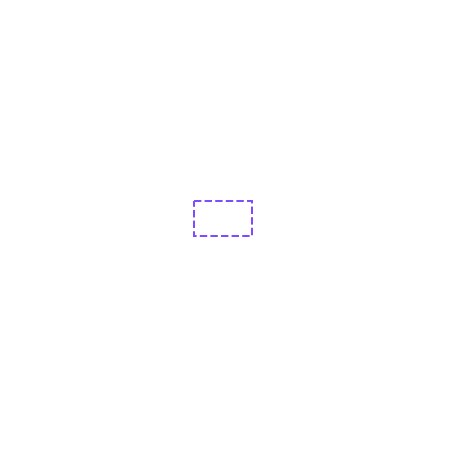

In [21]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

Processing 1 images
image                    shape: (128, 128, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 71)               min:    0.00000  max:  128.00000  int32
anchors                  shape: (1, 4092, 4)          min:   -0.71267  max:    1.20874  float32


C:\Users\bbuke\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


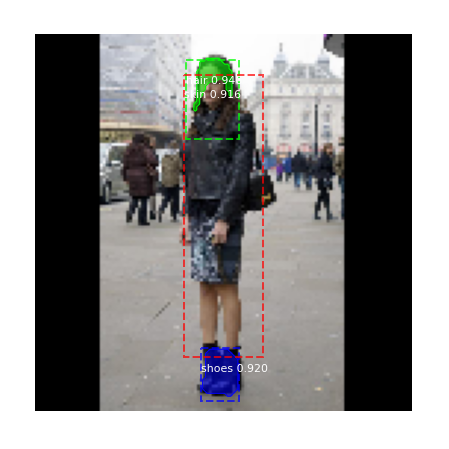

In [22]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())